# Линейная регрессия


Линейные методы предполагают, что между признаками объекта и целевой переменной существует линейная зависимость, то есть:
$$ \hat{y} = w_1 x_1 + w_2 x_2 + ... + w_k x_k + b,$$
где $\hat{y}$ - целевая переменная (что мы хотим предсказать), $x_i$ - i-ый признак объекта $x$, $w_i$ - вес $i$-го признака, $b$ - bias (смещение, свободный член).

В задаче линейной регрессии $\hat{y}$ - это действительное число.

Часто для упрощения записи вводят дополнительный фиктивный признак $x_0$, который всегда равен 1, тогда bias - вес этого признака. В этом случае формула может быть записана как скалярное произведение:
$$ \hat{y} = <w, x> $$

В матричной форме формулу можно переписать следующим образом:
$$ \hat{y} = Xw,$$
$\hat{y}$ - вектор значений целевой переменной размера $n$, $X$ - матрица значений признаков объектов размера $n \times k$, w - вектор весов размера $k$. То есть в наших данных имеется $n$ объектов, каждый их которых описан $k$ признаками.

Таким образом, в матричной форме модель задаётся следующим образом:
$$ y = Xw + \epsilon$$ 

Важно отметить, что параметрами этой модели являются веса $w$. Когда говорят об обучении какого-либо алгоритма машинного обучения, как правило, имеют в виду настройку весов, т.е. параметров модели.  

На практике $\hat{y} $ может отличается от реальных значений, которые принимает целевая переменная $y$. Разницу между реальным значением и предсказанным, обозначим как $\epsilon$ - вектор значений случайной переменной, соответствующая случайной, непрогнозируемой ошибке модели. Ограничения, которые накладываются на эту модель:
* математическое ожидание случайных ошибок $\epsilon$ равно нулю,
* дисперсия случайных ошибок одинакова и конечна,
* случайные ошибки не скоррелированы.

Один из способов вычислить значения параметров модели, давно знаком - это наименьших квадратов, который минимизирует среднеквадратичную ошибку между реальным значением зависимой переменной и прогнозом, выданным моделью. Решение по методу наименьших квадратов дает:
$$ w = (X^TX)^{-1}X^TY $$

Загрузим необходимые библиотеки

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

## Оценка результатов

Чтобы оценить качество работы алгоритма нам необходимо применяют разные метрики. Наиболее частые метрики средневадратичная и средняя абсолютная ошибки. Вычислим эти метрики на обучающей и на тестовой выборках. 

 * *mean_absolute_error* - средняя абсолютная ошибка $|y_i - \hat{y}_i|$
 * *mean_squared_error* - средняя квадратичная ошибка $(y_i - \hat{y}_i)^2$

## Задание 3.1

Пример 1. Сгенерируем искусственные данные. Сначала поработаем с простейшим одномерным случаем, когда у нас значение $y$ будет зависеть только от одного значения $x$.




In [ ]:
def generate_data(n_points=20):
  """
    Принимает на вход n_points точек 
    Возвращает данные для обучения и теста
  """
  X = np.linspace(-5, 5, n_points)
  y = 10 * X - 7

  X_train = X[0::2].reshape(-1, 1)
  y_train = y[0::2] + np.random.randn(int(n_points/2)) * 10

  X_test = X[1::2].reshape(-1, 1)
  y_test = y[1::2] + np.random.randn(int(n_points/2)) * 10

  print(f'Generated {len(X_train)} train samples and {len(X_test)} test samples')
  return X, X_train, y_train, X_test, y_test

In [ ]:
X, X_train, y_train, X_test, y_test = generate_data(100)

Generated 50 train samples and 50 test samples


In [ ]:
### Реализуйте настройку w и b с помощью рассмотренного выше метода наименьших квадратов.
### Найдите значения метрик MSE и MAE. Сравните с результатами из sklearn

In [ ]:
X_train_refactored = np.vstack([X_train.T, np.ones(len(X_train))]).T
y_train_refactored = y_train[:, np.newaxis]

w_b = np.linalg.inv(X_train_refactored.T@X_train_refactored)@X_train_refactored.T@y_train_refactored
print(w_b)

[[ 9.6863672 ]
 [-5.94962577]]


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

my_mse = mean_squared_error(X_test*w_b[0]+w_b[1], y_test)
my_mae = mean_absolute_error(X_test*w_b[0]+w_b[1], y_test)

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
sk_predict = regr.predict(X_test)

sk_mse = mean_squared_error(y_test, sk_predict)
sk_mae = mean_absolute_error(y_test, sk_predict)

In [ ]:
print(f'My MAE: {my_mae}\nMy MSE: {my_mse}')
print(f'Sklearn\'s MAE: {sk_mae}\nSklearn\'s MSE: {sk_mse}')

My MAE: 8.592305663744733
My MSE: 103.64316558049198
Sklearn's MAE: 8.59230566374473
Sklearn's MSE: 103.64316558049191


## Задание 3.2

Пример 2. Не всегда в задаче регрессии в качестве решения выступает прямая, как в предыдущем случае. Рассмотрим ещё один пример, в котором у объектов всё ещё один признак. Но теперь мы будм брать случайную точку на синусоиде и добавлять к ней шум — таким образом получим целевую переменную, признаком в этом случае будет координата $x$.

In [ ]:
def generate_wave_set(n_support=1000, n_train=25, std=0.3):
    data = {}
    # выберем некоторое количество точек из промежутка от 0 до 2*pi
    data['support'] = np.linspace(0, 2*np.pi, num=n_support)
    # для каждой посчитаем значение sin(x) + 1
    # это будет ground truth
    data['values'] = np.sin(data['support']) + 1
    # из support посемплируем некоторое количество точек с возвратом, это будут признаки
    data['x_train'] = np.sort(np.random.choice(data['support'], size=n_train, replace=True))
    # опять посчитаем sin(x) + 1 и добавим шум, получим целевую переменную
    data['y_train'] = np.sin(data['x_train']) + 1 + np.random.normal(0, std, size=data['x_train'].shape[0])
    return data

data = generate_wave_set(1000, 250)

In [ ]:
### попробуйте реализовать настройку w и b с помощью рассмотренного выше метода наименьших квадратов.
### Найдите значения метрик MSE и MAE

In [ ]:
data['x_train_ref'] = np.vstack([data['x_train'].T, np.ones(len(data['x_train']))]).T
data['y_train_ref'] = data['y_train'][:, np.newaxis]

w_b_sin = np.linalg.inv(data['x_train_ref'].T@data['x_train_ref'])@data['x_train_ref'].T@data['y_train_ref']
print(w_b_sin)

[[-0.32261564]
 [ 2.05186368]]


In [ ]:
my_mse_sin = mean_squared_error(data['support']*w_b_sin[0]+w_b_sin[1], data['values'])
my_mae_sin = mean_absolute_error(data['support']*w_b_sin[0]+w_b_sin[1], data['values'])

print(f'MAE: {my_mae_sin}\nMSE: {my_mse_sin}')

MAE: 0.3891373532099218
MSE: 0.19948356798182273


Конечно, такое решение нас вряд ли может устроить. Нужно применить полинимиальную регрессию. Идея здесь такая. Каждый признак в исходную формулу может входить не только в первой степени, но и во второй, в третьей и так далее. То есть для случая, когда у нас только один признак:
$$ \hat{y} = w_1 x_1 + w_2 x_1^2 + ... + w_k x_1^k + b,$$ 

## Задание 3.3

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

### Реализуйте полиномиальную регрессию. Сделайте визуализацию для полиномов разных степеней. 
### Полином какой степени подходит больше других? Почему?

In [ ]:
def calculate_polynomial(degree=3):
    poly = PolynomialFeatures(degree = degree)
    x_poly = poly.fit_transform(data['x_train_ref'])

    data['support_ref'] = np.vstack([data['support'].T, np.ones(len(data['support']))]).T

    poly_regr = linear_model.LinearRegression()
    poly_regr.fit(x_poly, data['y_train_ref'])
    poly_pred = poly_regr.predict(poly.fit_transform(data['support_ref']))

    poly_mse = mean_squared_error(poly_pred, data['values'])
    poly_mae = mean_absolute_error(poly_pred, data['values'])

#     print(f'Degree: {degree}\nMAE: {poly_mae}\nMSE: {poly_mse}\n')
    
    return(poly_mae, poly_mse, poly_pred)

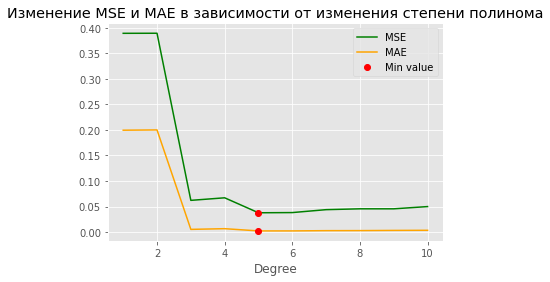

In [ ]:
poly_res = []
for i in range(1, 11):
    poly_res.append(calculate_polynomial(i))

poly_res = np.array(poly_res)

plt.plot(range(1,11), poly_res[:,0], color='green', label='MSE')
plt.plot(range(1,11), poly_res[:,1], color='orange', label='MAE')

min_mae = min((val, idx) for (idx, val) in enumerate(poly_res[:,0]))
min_mse = min((val, idx) for (idx, val) in enumerate(poly_res[:,1]))
plt.plot(min_mae[1] + 1, min_mae[0], 'ro', color='red')
plt.plot(min_mse[1] + 1, min_mse[0], 'ro', color='red', label='Min value')

plt.legend()
plt.xlabel('Degree')
plt.title('Изменение MSE и MAE в зависимости от изменения степени полинома')
plt.show()

> Полином какой степени подходит больше других? Почему?

Как видно из графика выше лучшие показатели MSE и MAE у полинома со степенью 5.
У полиномов с более высокой степенью возникает проблема переобученности.
Полиномы со степенью 3 и 4 описывают синусоидальную структуру, но их показатели страдают из-за шума в данных. На более длинном отрезке лучший результат будет у полинома со степенью 3.

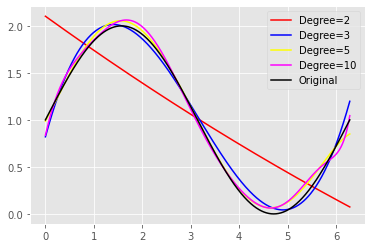

In [ ]:
plt.plot(data['support'], poly_res[1,2], color='red', label='Degree=2')
plt.plot(data['support'], poly_res[2,2], color='blue', label='Degree=3')
plt.plot(data['support'], poly_res[4,2], color='yellow', label='Degree=5')
plt.plot(data['support'], poly_res[9,2], color='magenta', label='Degree=10')
plt.plot(data['support'], data['values'], color='black', label='Original')
plt.legend()
plt.show()

# Реальный датасет

Возьмём реальный набор данных Boston из sklearn.datasets. Этот датасет описывает средние цены на недвижимость в районах Бостона в тысячах долларов.

Примеры признаков объектов недвижимости: количество преступлений на душу населения, процент старых домов в районе, количество учеников на одного учителя и т.д. Обратите внимание на то, что данные уже оцифрованы там, где изначально признаки были качественными.

Загрузим датасет, выведем информацию

In [ ]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [ ]:
x, y = load_boston(return_X_y=True)

## Задание 3.4

In [ ]:
### оставьте в наборе данных только 7 наиболее значимых признаков
### настройте параметры линейной регрессии и сравните метрики качества (MSE и MAE) для полного датасета и усечённого

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.5)

boston_regr = linear_model.LinearRegression()
boston_regr.fit(x_train, y_train)

boston_pred = boston_regr.predict(x_test)

boston_mse = mean_squared_error(boston_pred, y_test)
boston_mae = mean_absolute_error(boston_pred, y_test)

print(f'MAE: {boston_mae}\nMSE: {boston_mse}')

MAE: 3.1182814927087352
MSE: 22.69177387668045


In [ ]:
print(f'До нормировки:\n{boston_regr.coef_}')

scaler = StandardScaler()
x_train_normed = scaler.fit_transform(x_train)
x_test_normed = scaler.transform(x_test)

boston_regr_normed = linear_model.LinearRegression()
boston_regr_normed.fit(x_train_normed, y_train)
boston_regr.predict(x_test)
print(f'После нормировки:\n{boston_regr_normed.coef_}')

До нормировки:
[ 7.10400230e-03  5.39887849e-02  3.67772428e-02  3.98366105e+00
 -1.34904714e+01  3.43979703e+00  1.76824811e-02 -1.42980084e+00
  2.74016518e-01 -8.49833350e-03 -7.81404087e-01  9.55017498e-03
 -7.74518600e-01]
После нормировки:
[ 0.04000942  1.36042076  0.2562318   1.04989674 -1.52055612  2.4865939
  0.48470849 -3.10351961  2.31139156 -1.39475702 -1.74317725  0.8634343
 -5.41922541]


In [ ]:
indexes_with_lowest_coef = [i[0] for i in sorted(list(enumerate([abs(coef) for coef in boston_regr_normed.coef_])), key=lambda x:x[1])[:6]]

x_train_trimed = np.delete(x_train, indexes_with_lowest_coef, axis=1)
x_test_trimed = np.delete(x_test, indexes_with_lowest_coef, axis=1)
print(x_train_trimed.shape, x_test_trimed.shape)

boston_regr_trimed = linear_model.LinearRegression()
boston_regr_trimed.fit(x_train_trimed, y_train)

boston_pred_trimed = boston_regr_trimed.predict(x_test_trimed)

boston_mse_trimed = mean_squared_error(boston_pred_trimed, y_test)
boston_mae_trimed = mean_absolute_error(boston_pred_trimed, y_test)

print(f'Trimed MAE: {boston_mae_trimed}\nTrimed MSE: {boston_mse_trimed}')

(253, 7) (253, 7)
Trimed MAE: 3.7166253729006917
Trimed MSE: 24.441280691298157
